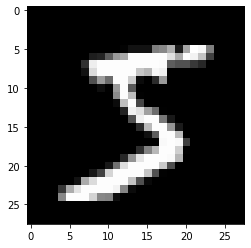

In [18]:
# autoencoders are neural networks that are trained to encode and decode data
# by encoding we mean compressions, denoising it, or reducing it to less information than the input, ideally

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[0], cmap='gray')

In [19]:
x_train[0].shape

# values in data is 0 to 255, so we divide by 255 to get values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation='relu')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

# decoder_input = keras.layers.Dense(64, activation='relu')(encoder_output)

# need to end on 784 values at some point because of 28x28 image
decoder_input = keras.layers.Dense(784, activation='relu')(encoder_output)
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_input)

# optimizer
opt = keras.optimizers.Adam(lr=0.001, decay = 1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 784)               50960     
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


C:\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
autoencoder.compile(optimizer=opt, loss='mse')

# TODO: find more info on epochs
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0165 - val_loss: 0.0107
Epoch 2/3
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 3/3
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0097 - val_loss: 0.0097


In [22]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
print(example)

[0.79041725 0.85572237 2.068806   1.932867   1.5017406  1.0485802
 2.6551366  0.15111147 0.33415273 1.1681076  1.0246656  1.4354446
 1.5970509  0.         0.54935384 0.47148746 1.4167712  0.
 0.93026245 0.7447275  0.8141854  0.5858971  0.34809157 1.2512391
 1.0752541  1.0916587  2.8111207  1.1872622  3.0004275  0.2969828
 0.7579932  0.961482   2.1102376  0.13363066 0.52290213 1.1147395
 0.40480846 1.1820216  2.6906805  0.93970394 1.0725025  0.742692
 0.15301555 0.59203064 1.0871779  0.65096444 1.230842   0.81266516
 0.19742528 0.75386304 1.6824908  1.6677853  0.37096936 0.593801
 0.7619791  2.5192351  0.3273646  2.2391138  0.         0.7022207
 2.1051686  1.3343365  1.3724461  0.24995184]


In [23]:
example.shape

(64,)

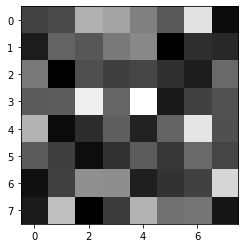

In [24]:
plt.imshow(example.reshape(8, 8), cmap='gray')

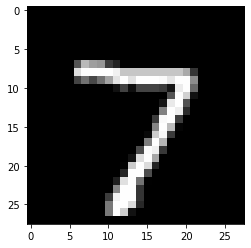

In [25]:
plt.imshow(x_test[0], cmap='gray')

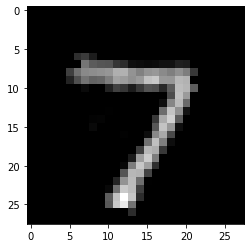

In [26]:
ae_out = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
plt.imshow(ae_out, cmap='gray')

In [27]:
# a function to randomly add noise to the image (randomly change pixel values)
import random

def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pixel in row:
            if random.choice(range(100)) <= random_chance:
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pixel)
        noisy.append(new_row)
    return np.array(noisy)

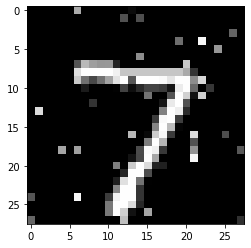

In [28]:
noisy = add_noise(x_test[0])
plt.imshow(noisy, cmap='gray')

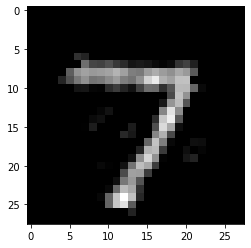

In [29]:
ae_out = autoencoder.predict([noisy.reshape(-1, 28, 28, 1)])[0]
plt.imshow(ae_out, cmap='gray')